In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns

In [2]:
moviedata = pd.read_csv("movies_data.csv")

In [3]:
moviedata.shape

(2242, 11)

In [4]:
moviedata.columns

Index(['budget', 'genres', 'id', 'production_companies', 'release_date',
       'release_month', 'revenue', 'tagline', 'title', 'vote_average',
       'award_noms'],
      dtype='object')

In [8]:
moviedata.head()

,budget,genres,id,production_companies,release_date,release_month,revenue,tagline,title,vote_average,award_noms
0,3512454,Drama,110428,"[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...",3/13/2013,March,115860,NaN,Camille Claudel 1915,7.0,0
1,40000000,Adventure,77221,"[{'name': 'France 2 CinÃ©ma', 'id': 83}, {'nam...",12/21/2011,December,5446000,NaN,Black Gold,5.9,0
2,21000000,Crime,1646,"[{'name': 'Double Feature Films', 'id': 215}, ...",1/5/2007,January,41170784,Their story. Their world. Their future.,Freedom Writers,7.6,0
3,20000000,Action,14396,"[{'name': 'New Line Cinema', 'id': 12}]",1/5/2007,January,10337477,NaN,Code Name: The Cleaner,4.7,0
4,13000000,Drama,1931,"[{'name': 'Rainforest Films', 'id': 1309}]",5/16/2007,May,75511123,He will challenge their traditions. Their trad...,Stomp the Yard,6.1,0


In [3]:
movdat = moviedata[['title','revenue','budget','genres','release_month','vote_average','award_noms']]
roi = pd.DataFrame((movdat['revenue']/movdat['budget']-1),columns=['roi'])
movdat_df = pd.merge(movdat,roi, how='outer',left_index=True,right_index=True)
movdat_df.head()

,title,revenue,budget,genres,release_month,vote_average,award_noms,roi
0,Camille Claudel 1915,115860,3512454,Drama,March,7.0,0,-0.967015
1,Black Gold,5446000,40000000,Adventure,December,5.9,0,-0.863850
2,Freedom Writers,41170784,21000000,Crime,January,7.6,0,0.960514
3,Code Name: The Cleaner,10337477,20000000,Action,January,4.7,0,-0.483126
4,Stomp the Yard,75511123,13000000,Drama,May,6.1,0,4.808548


In [32]:
movdat_df['genres'].value_counts()

Drama              556
Comedy             431
Action             409
Adventure          151
Horror             127
Thriller           113
Crime               97
Animation           78
Romance             56
Fantasy             51
Science Fiction     42
Family              29
Mystery             28
Documentary         23
War                 19
History             17
Music                7
Western              5
Foreign              3
Name: genres, dtype: int64

In [12]:
g = movdat_df.groupby('genres').sum()
g = g.drop(columns=['vote_average', 'roi'])
groi = pd.DataFrame((g['revenue']/g['budget']-1),columns=['roi'])
g = pd.merge(g,groi, how='outer',left_index=True,right_index=True)
g = g.reset_index()
g2 = movdat_df.groupby('genres').mean()
g2 = g2.drop(columns=['budget', 'revenue','award_noms','roi'])
g2 = g2.reset_index()
g3 = pd.merge(g,g2)
g3 = g3.sort_values(['revenue'], ascending=False)
g3.head(6) 


,genres,revenue,budget,award_noms,roi,vote_average
0,Action,75043861342,24686812673,45,2.039836,6.115159
1,Adventure,38384582208,13505729594,32,1.842096,6.279470
3,Comedy,30569734424,10457845667,42,1.923139,5.981671
6,Drama,28356420918,10693547761,247,1.651732,6.545324
2,Animation,24190848980,6672784588,21,2.625300,6.478205
15,Science Fiction,11274598085,3161420003,14,2.566308,6.364286


In [37]:
tr = g3['revenue'].sum()
tr

257404723585

In [52]:
acr = g3.loc[0,'revenue']/tr
adr = g3.loc[1,'revenue']/tr
cmr = g3.loc[3,'revenue']/tr
drr = g3.loc[6,'revenue']/tr
anr = g3.loc[2,'revenue']/tr
scr = g3.loc[15,'revenue']/tr
#values for chart

rev_genre = pd.DataFrame([acr,adr,cmr,drr,anr,scr], columns=['% of Revenue']) 

rev_genre.style.format("{:.2%}")

,% of Revenue
0,29.15%
1,14.91%
2,11.88%
3,11.02%
4,9.40%
5,4.38%


In [ ]:
genrelabels = ["Action", "Adventure", "Comedy","Drama","Animation","Science Fiction"]
plt.pie(rev_genre, labels=genrelabels,
        autopct="%1.1f%%",startangle=60, shadow=True)

In [18]:
g3.describe()

,revenue,budget,award_noms,roi,vote_average
count,1.900000e+01,1.900000e+01,19.000000,19.000000,19.000000
mean,1.354762e+10,4.555464e+09,27.421053,2.064643,6.278701
std,1.890429e+10,6.330998e+09,55.010419,0.693380,0.380253
min,3.592951e+06,9.973610e+05,0.000000,0.968117,5.300000
25%,1.255198e+09,4.080561e+08,4.000000,1.602418,6.072094
50%,7.603743e+09,2.310643e+09,12.000000,1.923139,6.364286
75%,1.773272e+10,5.363862e+09,28.000000,2.584383,6.511764
max,7.504386e+10,2.468681e+10,247.000000,3.495328,6.900000


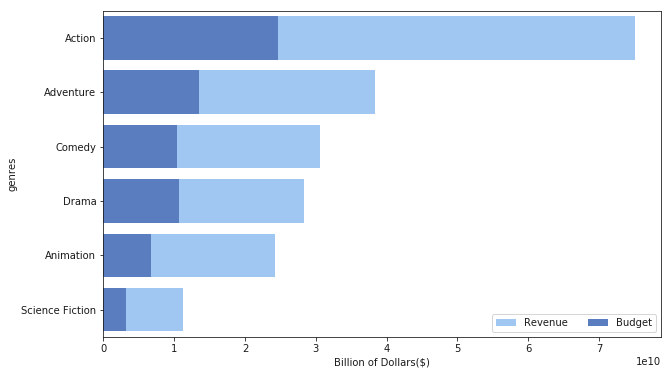

In [61]:
plt.subplots(figsize=(10, 6))
sns.set_color_codes("pastel")
sns.barplot(x="revenue", y="genres", data=g3,label="Revenue", color="b")
sns.set_color_codes("muted")
sns.barplot(x="budget", y="genres", data=g3,label="Budget", color="b")
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.xlabel("Billion of Dollars($)")
plt.show()

In [33]:
movdat_df['release_month'].value_counts()

September    298
October      214
August       189
December     189
February     178
March        176
May          174
July         167
April        166
June         164
November     164
January      163
Name: release_month, dtype: int64

In [43]:
mo = movdat_df.groupby('release_month').sum()
mo = mo.drop(columns=['vote_average', 'roi'])
moroi = pd.DataFrame((mo['revenue']/mo['budget']-1),columns=['roi'])
mo = pd.merge(mo,moroi, how='outer',left_index=True,right_index=True)
mo = mo.reset_index()
mo2 = movdat_df.groupby('release_month').mean()
mo2 = mo2.drop(columns=['budget', 'revenue','award_noms','roi'])
mo2 = mo2.reset_index()
mo3 = pd.merge(mo,mo2)
mo3 = mo3.sort_values(['revenue'], ascending=False)
mo3

,release_month,revenue,budget,award_noms,roi,vote_average
6,June,37458553218,10053027964,20,2.726097,6.260366
2,December,29682127801,9099080528,101,2.262102,6.338624
8,May,27325073348,9387618741,46,1.910757,6.370690
5,July,24704426548,8080515448,32,2.057283,6.220958
9,November,22418144562,7181503469,133,2.121651,6.453049
0,April,21329321356,6582837936,2,2.240141,6.118675
7,March,21226776059,7761220129,8,1.734979,6.186364
10,October,17881531302,6603895033,65,1.707725,6.295327
3,February,15577154469,5556232967,19,1.803546,6.177528
11,September,15265393820,6268147108,59,1.435392,6.244631


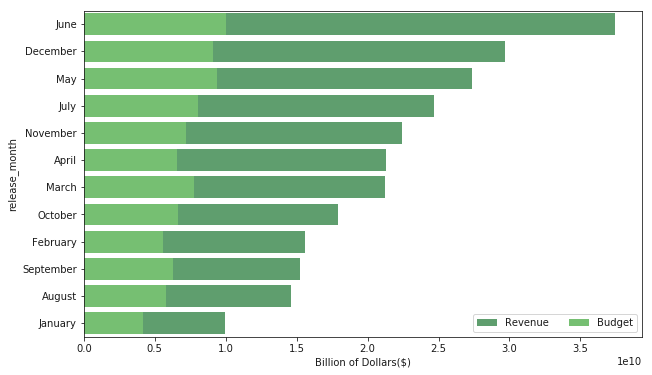

In [60]:
plt.subplots(figsize=(10, 6))
sns.set_color_codes("deep")
sns.barplot(x="revenue", y="release_month", data=mo3,label="Revenue", color="g")
sns.set_color_codes("muted")
sns.barplot(x="budget", y="release_month", data=mo3,label="Budget", color="g")
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.xlabel("Billion of Dollars($)")
plt.show()

In [69]:
movdat_df.corr()

,revenue,budget,vote_average,award_noms,roi
revenue,1.000000,0.783859,0.193535,0.197553,-0.006056
budget,0.783859,1.000000,0.074723,0.094426,-0.024073
vote_average,0.193535,0.074723,1.000000,0.245995,-0.027562
award_noms,0.197553,0.094426,0.245995,1.000000,-0.004273
roi,-0.006056,-0.024073,-0.027562,-0.004273,1.000000


In [13]:
g3.corr()

,revenue,budget,award_noms,roi,vote_average
revenue,1.000000,0.994348,0.376329,-0.017470,-0.105804
budget,0.994348,1.000000,0.423200,-0.099370,-0.100747
award_noms,0.376329,0.423200,1.000000,-0.194001,0.171929
roi,-0.017470,-0.099370,-0.194001,1.000000,-0.258650
vote_average,-0.105804,-0.100747,0.171929,-0.258650,1.000000


In [45]:
mo3.corr()

,revenue,budget,award_noms,roi,vote_average
revenue,1.000000,0.958641,0.202686,0.901279,0.576018
budget,0.958641,1.000000,0.250427,0.757538,0.660786
award_noms,0.202686,0.250427,1.000000,0.153446,0.800369
roi,0.901279,0.757538,0.153446,1.000000,0.444587
vote_average,0.576018,0.660786,0.800369,0.444587,1.000000


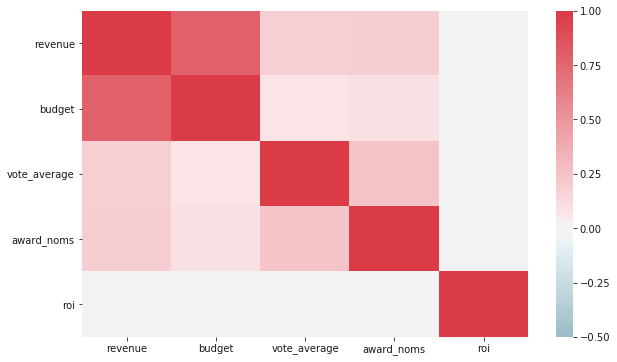

In [70]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(10, 6))
sns.heatmap(movdat_df.corr(),cmap=cmap,vmin=-0.5, center=0)

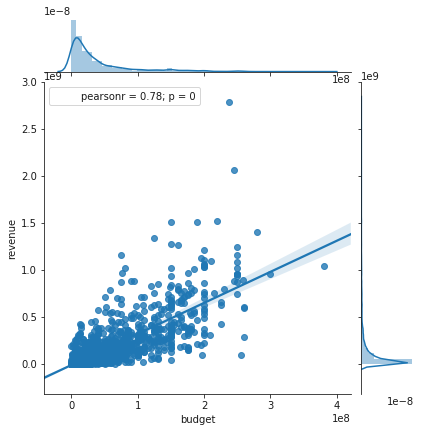

In [50]:
sns.jointplot('budget','revenue',data=movdat_df,kind="reg")


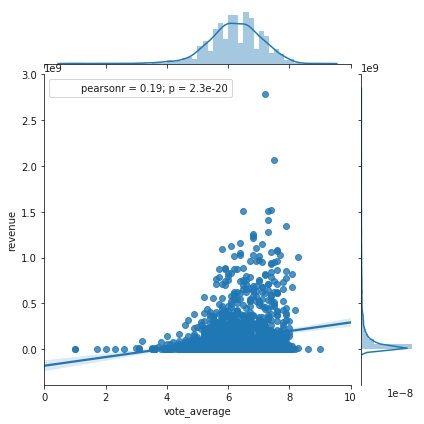

In [52]:
sns.jointplot('vote_average','revenue',data=movdat_df,kind="reg")

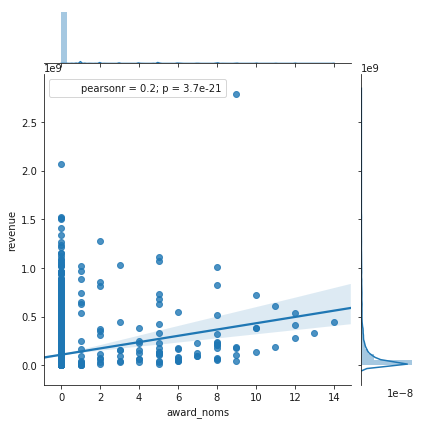

In [51]:
sns.jointplot('award_noms','revenue',data=movdat_df,kind="reg")

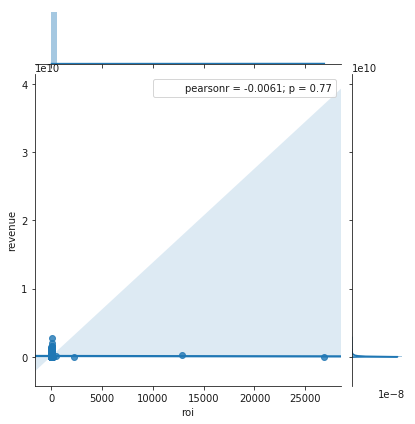

In [53]:
sns.jointplot('roi','revenue',data=movdat_df,kind="reg")

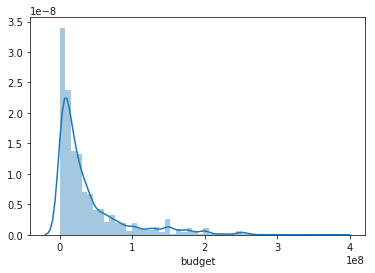

In [34]:
sns.distplot(movdat_df['budget'])